#### Load evoked data and plot topomaps for selected time points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mne.datasets import sample
from mne import read_evokeds

In [2]:
path = sample.data_path()
fname = path + '/MEG/sample/sample_audvis-ave.fif'

In [3]:
# Load evoked and substract baseline
condition = 'Left Auditory'
evoked = read_evokeds(fname,condition=condition,baseline=(None,0))

Reading /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)


In [4]:
# set time instants in seconds (from 50 to 150ms in a step of 10ms)
times = np.arange(0.05, 0.15, 0.01)
times
# If times is set to None only 10 regularly spaced topographies will be shown

array([ 0.05,  0.06,  0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14])

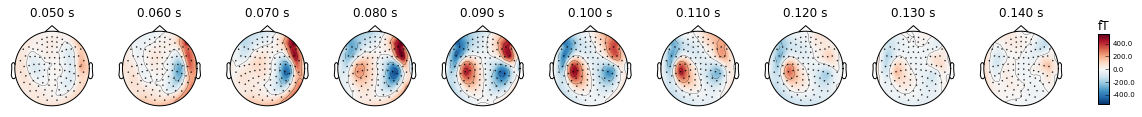

In [10]:
# plot magnetometer data as topomaps
# https://martinos.org/mne/stable/generated/mne.Evoked.html?highlight=evoked#mne.Evoked.plot_topomap
evoked.plot_topomap(times, ch_type='mag');

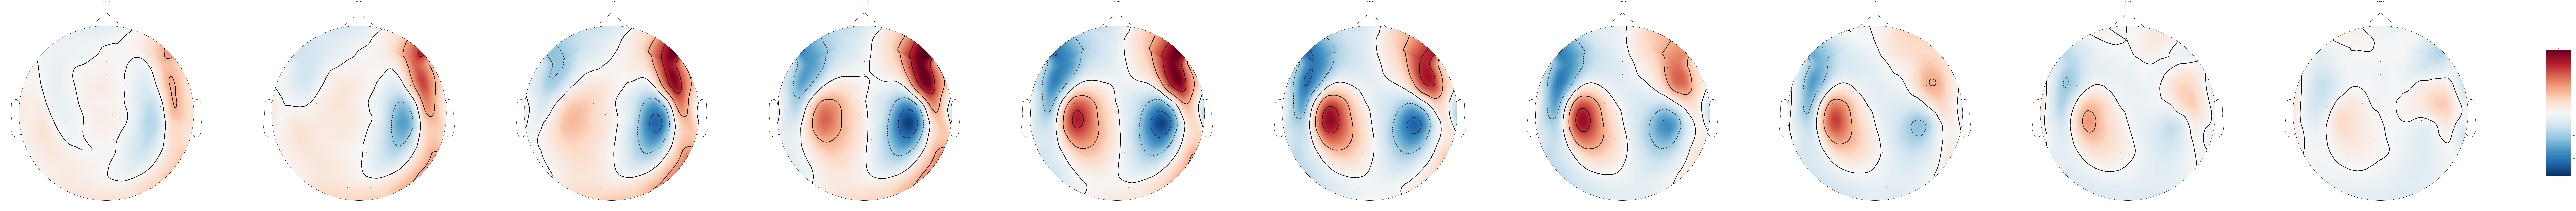

In [22]:
# compute a 50 ms bin to stabilize topographies
#average : float | None
# The time window around a given time to be used for averaging (seconds). 
# For example, 0.01 would translate into window that starts 5 ms before 
# and ends 5 ms after a given time point. 
# Defaults to None, which means no averaging.
#
evoked.plot_topomap(times, size=16,res=128, ch_type='mag', average=0.05);

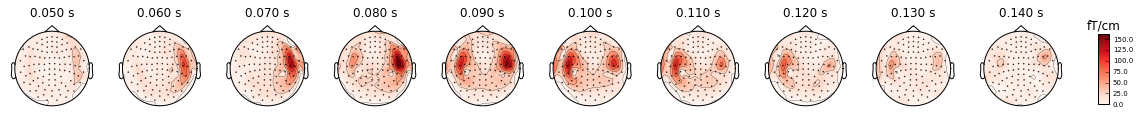

In [12]:
# plot gradiometer data (plots the RMS for each pair of gradiometers)
evoked.plot_topomap(times, ch_type='grad');

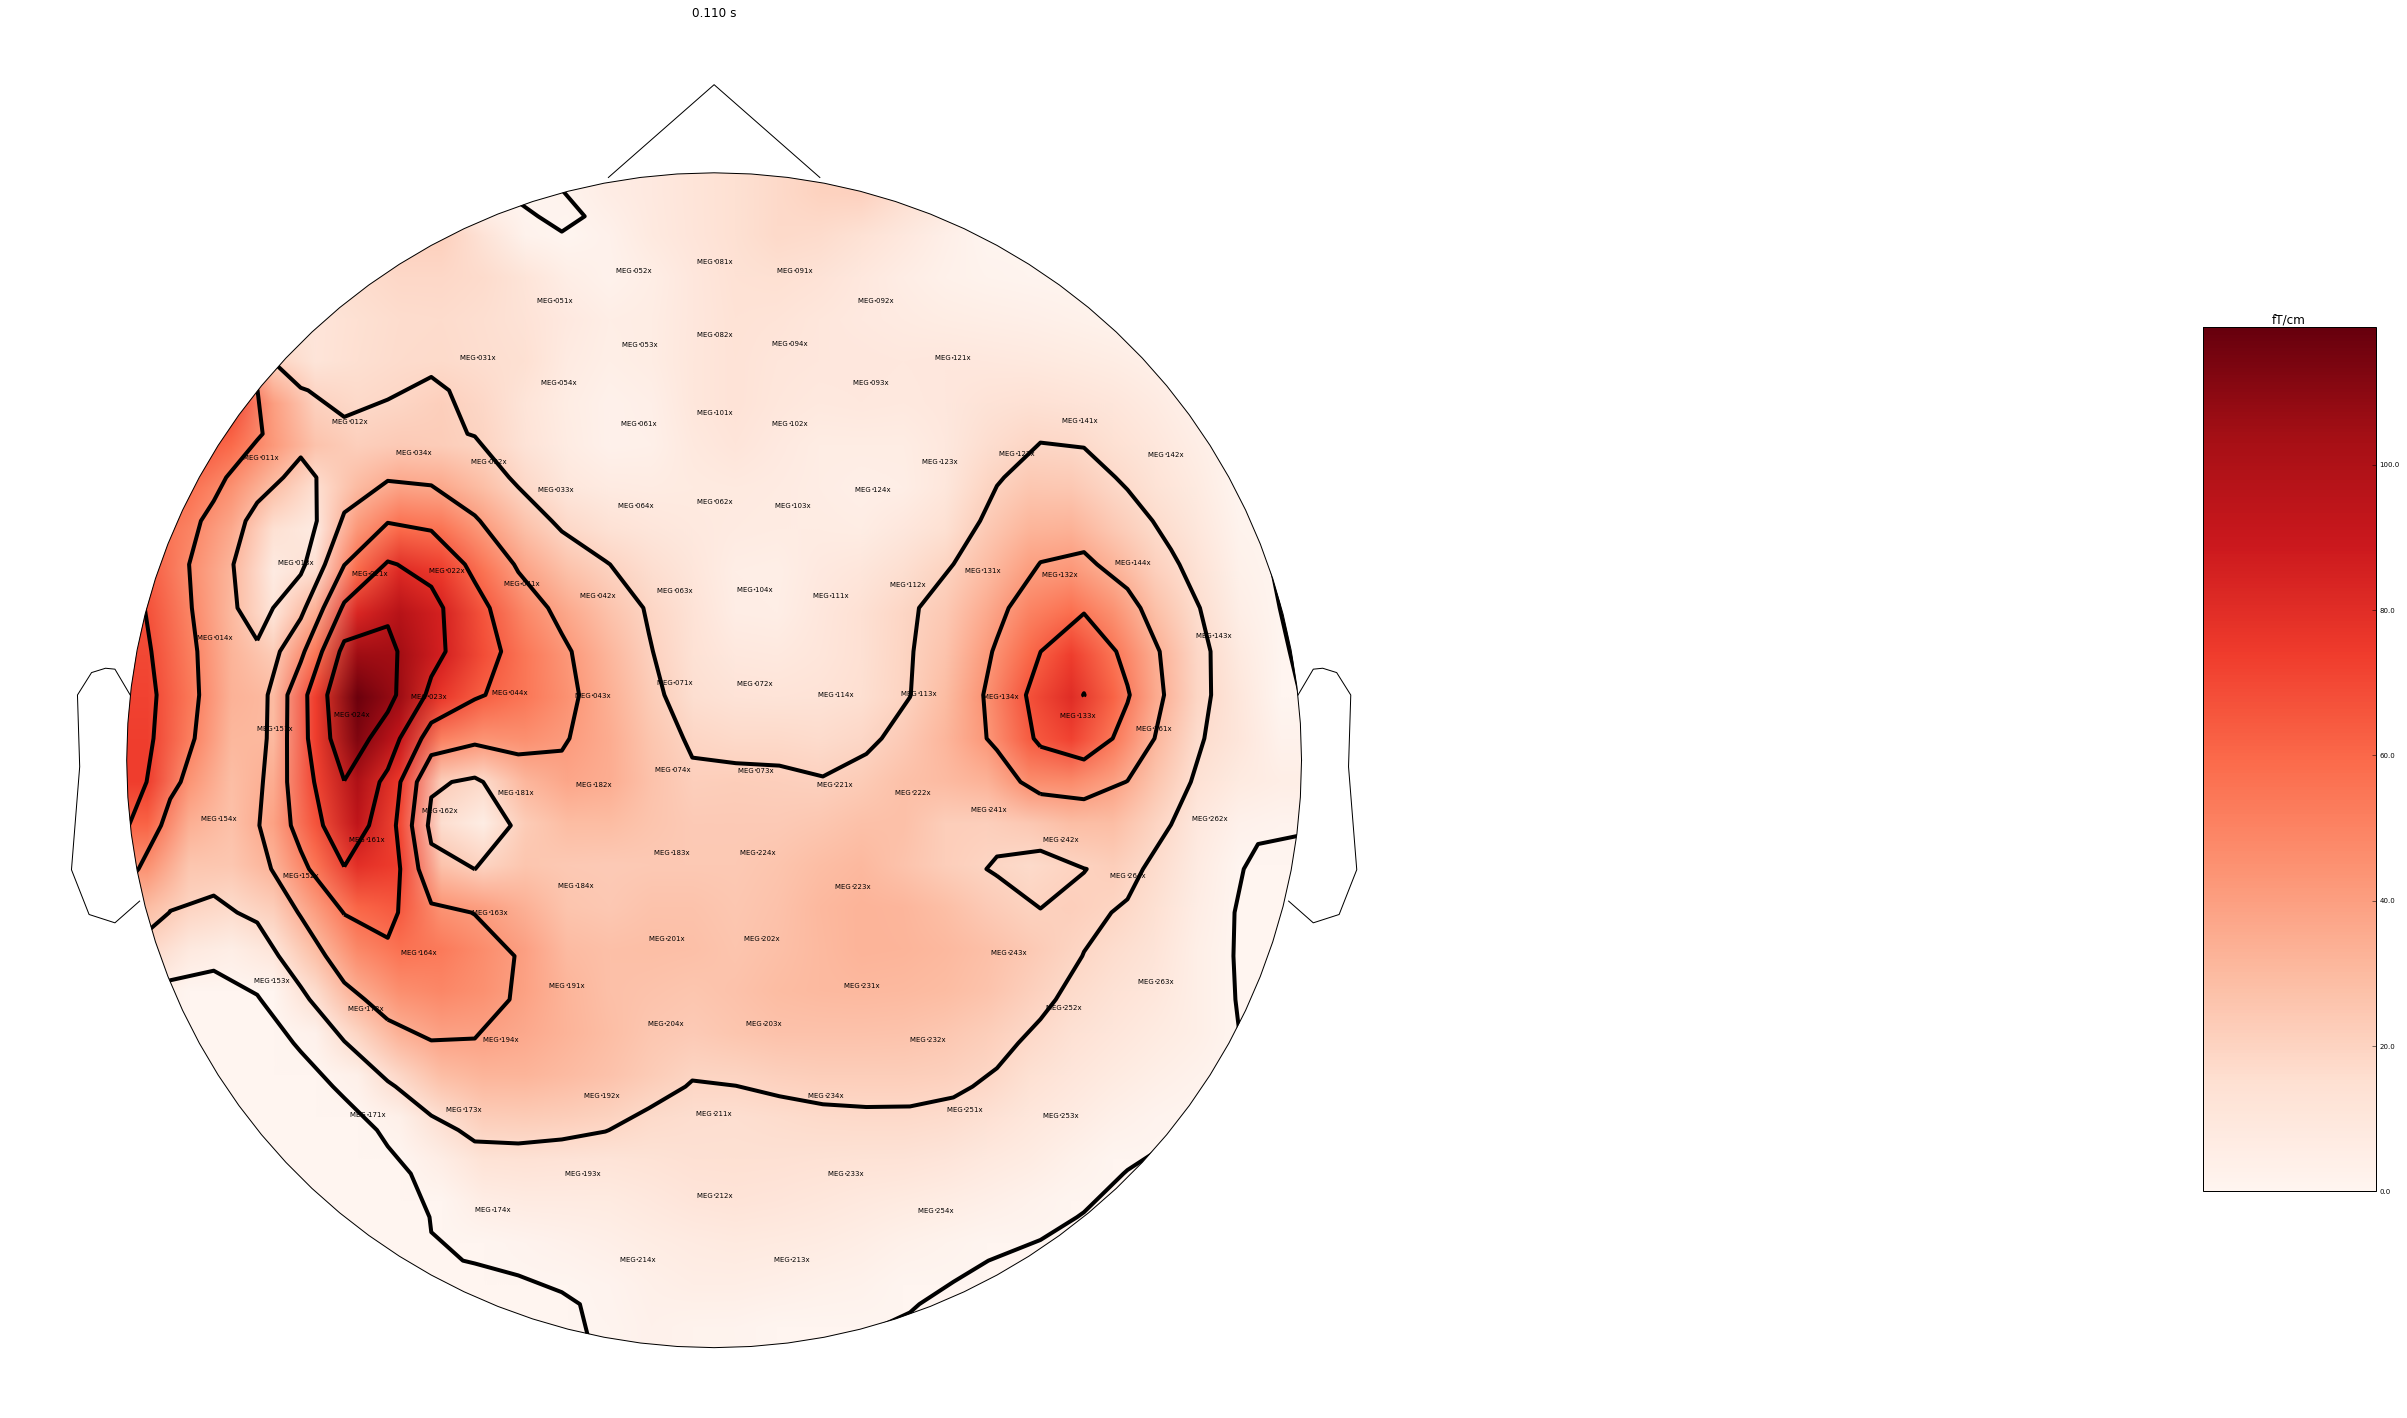

In [26]:
evoked.plot_topomap(0.11,size=16,res=28, ch_type='grad', show_names=True);

In [ ]:
# plot magnetometer data as an animation
# 警告:在jupyter下不能正常使用
evoked.animate_topomap(ch_type='mag', times=times, frame_rate=10)

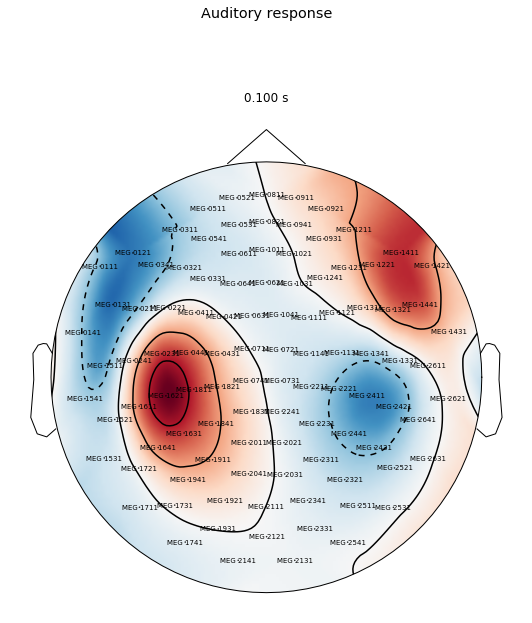

In [18]:
# plot magnetometer data as topomap at 1 time point : 100 ms
# and add channel labels and title
evoked.plot_topomap(0.1, ch_type='mag', show_names=True, colorbar=False,
                    size=6, res=128, title='Auditory response');

### Ref
- https://mne-tools.github.io/0.13/auto_examples/visualization/plot_evoked_topomap.html#sphx-glr-auto-examples-visualization-plot-evoked-topomap-py